In [1]:
%matplotlib inline

# Task 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import  linear_model
import seaborn as sns


import math
np.set_printoptions(precision=3)
plt.rcParams.update({'font.size': 22})

In [3]:

path_X = "../Project1_data/X.csv"
X = pd.read_csv(path_X)
path_Y = "../Project1_data/Y.csv"
Y = pd.read_csv(path_Y)

In [4]:
def NMAE(gt,pred,test_size):
    psum = 0
    gt = np.array(gt)
    for i in range(0,test_size):
        psum+= abs(gt[i] - pred[i])
    tmp = psum / test_size
    return tmp / np.mean(gt)

In [26]:
tmp = X.copy()
del tmp["TimeStamp"]
tmp["DispFrames"] = Y["DispFrames"]

tmp["DispFrames"] = tmp["DispFrames"].map(lambda x: 1 if x >= 18 else 0)
print(tmp.iloc[:,-1:])

      DispFrames
0              0
1              0
2              0
3              0
4              0
...          ...
3595           0
3596           0
3597           1
3598           1
3599           1

[3600 rows x 1 columns]


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


X_train, X_test, y_train, y_test = train_test_split(tmp.iloc[:,:-1], tmp.iloc[:,-1:], test_size=0.30, random_state=16)


logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(y_pred)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


[0 1 1 ... 1 1 1]


/Users/jiarro/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jiarro/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[358,  49],
       [ 42, 631]])

([<matplotlib.axis.YTick at 0x14bf0f950>,
 [Text(0, 0.5, 'Not Conform'), Text(0, 1.5, 'Conform')])

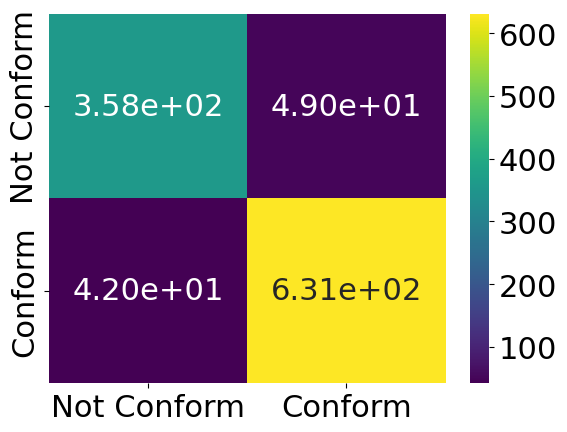

In [39]:
sns.heatmap(cnf_matrix, annot=True,fmt=".2e",cmap="viridis")
plt.xticks(ticks=[0.5,1.5],labels=["Not Conform","Conform"])
plt.yticks(ticks=[0.5,1.5],labels=["Not Conform","Conform"])